In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import RandomizedSearchCV

df= pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [56]:
df.shape

(301, 9)

In [57]:
print(df.Seller_Type.unique())
print(df.Transmission.unique())
print(df.Owner.unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [58]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [59]:
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


In [60]:
df.columns
car_data= df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
car_data['age']=2020-car_data['Year']
car_data.head(3)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3


In [61]:
car_data.drop('Year',1,inplace=True)
car_data.head(3)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3


In [62]:
car_data.dtypes


Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
age                int64
dtype: object

In [63]:
# plt.hist(df['Fuel_Type'].value_counts())


In [64]:
car_data = pd.get_dummies(car_data,drop_first=True)

In [65]:
car_data.head(3)

,Selling_Price,Present_Price,Kms_Driven,Owner,age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1


In [66]:
features = car_data.columns

plt.figure(figsize=(20,20))
# sns.heatmap(car_data[features].corr(),annot=True,cmap='RdYlGn')

# sns.pairplot(car_data)


<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [67]:
#scaling/standardizing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# min_max_scaler = MinMaxScaler()
scaler = MinMaxScaler()

# car_data['Kms_Driven'] = min_max_scaler.fit_transform(car_data['Kms_Driven'])

# car_data['Kms_Driven'] = car_data['Kms_Driven'].apply(
#                            lambda x: StandardScaler().fit_transform(x))
# car_data['Kms_Driven']

car_data[['Present_Price','Kms_Driven','age']] = scaler.fit_transform(car_data[['Present_Price','Kms_Driven','age']])
car_data

,Selling_Price,Present_Price,Kms_Driven,Owner,age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,0.057109,0.053053,0,0.266667,0,1,0,1
1,4.75,0.099913,0.085085,0,0.333333,1,0,0,1
2,7.25,0.103273,0.012813,0,0.066667,0,1,0,1
3,2.85,0.041504,0.009409,0,0.466667,0,1,0,1
4,4.60,0.070980,0.083984,0,0.266667,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,0.122237,0.067043,0,0.133333,1,0,0,1
297,4.00,0.060468,0.119119,0,0.200000,0,1,0,1
298,3.35,0.115735,0.175043,0,0.600000,0,1,0,1
299,11.50,0.131990,0.017017,0,0.066667,1,0,0,1


In [68]:
car_data

,Selling_Price,Present_Price,Kms_Driven,Owner,age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,0.057109,0.053053,0,0.266667,0,1,0,1
1,4.75,0.099913,0.085085,0,0.333333,1,0,0,1
2,7.25,0.103273,0.012813,0,0.066667,0,1,0,1
3,2.85,0.041504,0.009409,0,0.466667,0,1,0,1
4,4.60,0.070980,0.083984,0,0.266667,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,0.122237,0.067043,0,0.133333,1,0,0,1
297,4.00,0.060468,0.119119,0,0.200000,0,1,0,1
298,3.35,0.115735,0.175043,0,0.600000,0,1,0,1
299,11.50,0.131990,0.017017,0,0.066667,1,0,0,1


In [69]:
# sns.pairplot(car_data)

In [70]:
X=car_data.iloc[:,1:]
y=car_data.iloc[:,0]

In [71]:
#feature importance

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [72]:
model.feature_importances_

feature_importance = pd.Series(model.feature_importances_,index =X.columns)

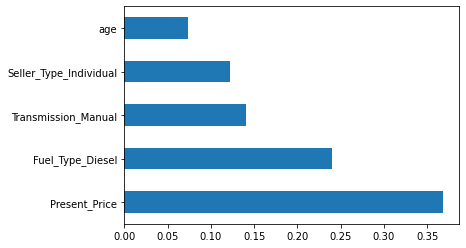

In [73]:
feature_importance.nlargest(5).plot(kind='barh')

In [74]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3)

In [75]:
display(X_train.shape, X_test.shape)

X.shape

(210, 8)

(91, 8)

(301, 8)

In [76]:
from sklearn.ensemble import RandomForestRegressor
rfrandom = RandomForestRegressor()

In [77]:
#hyperparameters 


print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [78]:
#Randomized searchCV

#number of decision trees
n_estimators= [int(x) for x in np.linspace(start=100 , stop=1200 , num=12) ]

#number of features to consider at every split 
max_features = ['auto','sqrt']

#max number of levels in tree
max_depth = [int(x) for x in np.linspace(start=5 , stop=30 , num=6) ]

#minimun number of samples required to split a node
min_samples_split = [2,5,10,15,100]

#minimun number of samples required to each leaf node
min_samples_leaf = [1,2,5,10]


random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [79]:
#base model to tune

rf =RandomForestRegressor()

In [80]:
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [81]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.7s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   56.5s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [84]:
rf_random.best_estimator_
# rf_random.best_score_

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000)

In [105]:
pred = rf_random.predict(X_test)

In [106]:
pred

array([ 5.66735,  4.90105,  1.28932,  5.50712,  4.31895,  5.02745,
        6.047  ,  2.41207,  6.74581,  0.82566,  1.00414,  2.93184,
        3.09064,  0.69761,  5.13535,  2.31215,  0.67391,  2.29046,
        3.90947,  1.14801,  0.51735,  6.25204,  1.12   ,  5.16809,
        2.96772, 20.48663,  0.38446,  0.96961,  9.79872,  0.92429,
       10.36995,  1.19979,  6.58363,  6.18246,  0.2686 ,  4.41225,
        5.72055,  2.8732 ,  1.12321,  4.38825,  2.89172,  3.7317 ,
       21.401  ,  5.14205,  0.39907,  0.97838,  0.37646,  0.99315,
        5.71455,  3.62923,  3.61248,  3.1597 ,  0.42779,  0.77838,
        0.65611, 11.96642,  1.42749,  4.68856,  3.4845 ,  7.0774 ,
        0.58881,  0.65349,  4.90035,  5.6826 ,  0.63831,  5.00284,
        9.97686,  0.91136,  4.84804,  5.14445,  1.21584,  0.64115,
       18.07538,  0.77841, 22.26584,  5.25524,  5.57427,  0.52271,
        4.05551,  0.57898,  8.12234,  0.2853 ,  4.00926,  9.24311,
        0.55651,  0.75353,  0.39913,  6.87509,  0.77916,  6.55

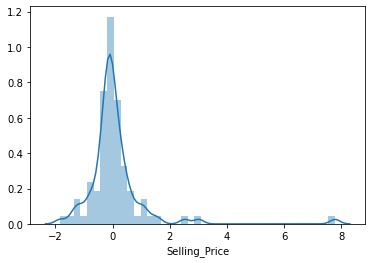

In [107]:
sns.distplot(y_test-pred)
# plt.scatter(y_test,pred)

In [108]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.5447337362637321
MSE: 1.1598102315527412
RMSE: 1.0769448600335771


In [109]:
import pickle

file=open('random_forest_regressor_model.pkl','wb')

#dump information to that file
pickle.dump(rf_random,file)

In [110]:
# model = pickle.load(open('random_forest_regressor_model.pkl', 'rb'))

### Accuracy of car prediction model 

In [115]:
metrics.r2_score(y_test,pred)
# rf_random.cv_results_

0.953988677656633

In [112]:
# a=np.array([6.87,43000,0,3,0,1,0,1])
# aa=pd.DataFrame(a)

# ad=aa.transpose()
# ad.columns=X_test.columns
# # aa
# ad

In [114]:
# rf_random.predict(ad)
# # aa

# # X_test

In [98]:
# 2017,7.25,9.85,6900,Petrol,Dealer,Manual,0